# Cancer dataset - Classification

## Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()
print('cancer keys: \n{}'.format(cancer.keys()))

cancer keys: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
cancer.data.shape

(569, 30)

In [7]:
pd.Series(cancer.target).value_counts()

1    357
0    212
dtype: int64

In [8]:
print('Sample counts per class:\n{}'.format(
      {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                    test_size=0.25, random_state=42)

In [33]:
print("y_train label counts:\n{}".format(
      {n: v for n,v in zip(cancer.target_names, np.bincount(y_train))}))

y_train label counts:
{'malignant': 159, 'benign': 267}


In [34]:
print("y_test label counts:\n{}".format(
      {n: v for n,v in zip(cancer.target_names, np.bincount(y_test))}))

y_test label counts:
{'malignant': 53, 'benign': 90}


# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
print("train set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("test set score: {:.3f}".format(logreg.score(X_test, y_test)))

train set score: 0.953
test set score: 0.958


As training and test set performances are very close, it is likely that the model is underfitting.
Increasing C will make the model more flexible, reducing regularization. This might help performance.
For comparison, let's descrease C as well.

In [80]:
logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("C = 0.001\ntrain set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("test set score: {:.3f}\n\n".format(logreg001.score(X_test, y_test)))
print("C = 100\ntrain set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

C = 0.001
train set score: 0.923
test set score: 0.937


C = 100
train set score: 0.972
test set score: 0.965


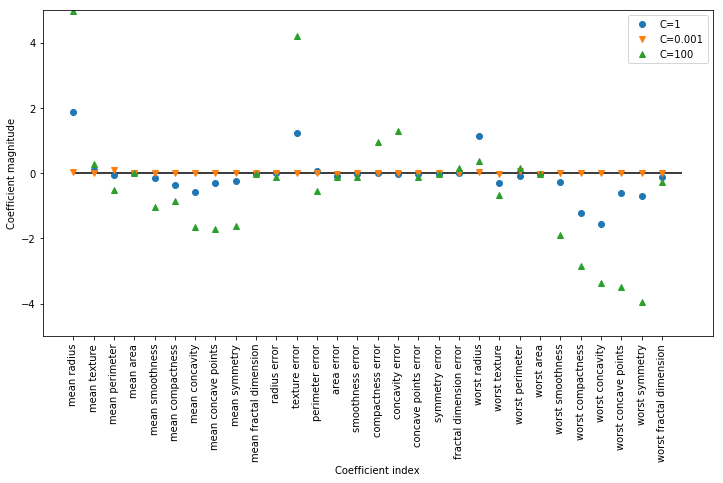

In [75]:
plt.figure(figsize=(12,6))
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()

Let's repeat it using L1 regularization for more interpretable results

train accuracy of L1 logreg with C=0.001: 0.913
test accuracy of L1 logreg with C=0.001: 0.923

train accuracy of L1 logreg with C=1.000: 0.960
test accuracy of L1 logreg with C=1.000: 0.958

train accuracy of L1 logreg with C=100.000: 0.986
test accuracy of L1 logreg with C=100.000: 0.979



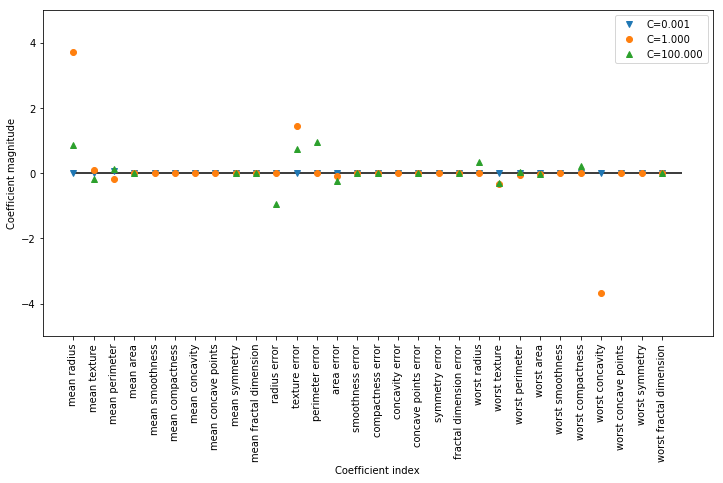

In [83]:
plt.figure(figsize=(12,6))

for C, marker in zip([0.001,1,100], ['v','o','^']):
    logreg_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("train accuracy of L1 logreg with C={:.3f}: {:.3f}".format(C, logreg_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C={:.3f}: {:.3f}\n".format(C, logreg_l1.score(X_test, y_test)))
    plt.plot(logreg_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-5,5)
plt.legend()